<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230415/%EC%9D%B4%EC%A4%80%EC%9A%B0_9_2%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#9-2 IMDB리뷰 분류하기


토큰<BR/>
* 문장에서 분리된 단어

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(train_input.shape, test_input.shape)
#길이가 제각각이라 고정크기의 2차원 배열에 넣는것보단 리뷰마다 파이썬 리스트로 담아야함

(25000,) (25000,)


In [ ]:
#첫번째 리뷰의 길이
print(len(train_input[0]))
#두번째 리뷰의 길이
print(len(train_input[1]))

218
189


In [ ]:
#첫번째 리뷰의 내용
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2,random_state=42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))
#평균 단어 개수는 239개, 중간값이 178
#한쪽으로 치우친 분포

239.00925 178.0


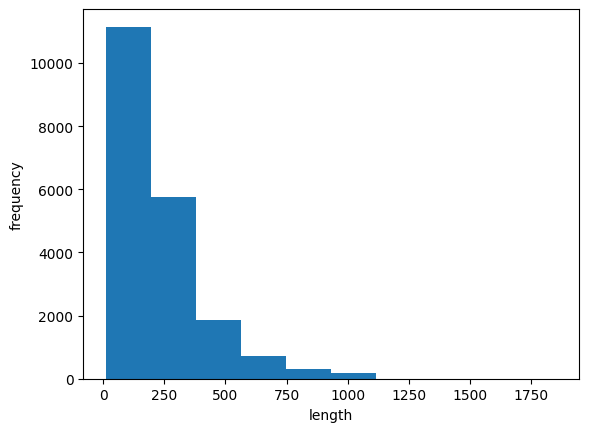

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()
#오른쪽 끝에 아주 큰 값이 있어서 평균이 높게나옴

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)
#(20000,100)의 이차원 배열이 됨

(20000, 100)


In [ ]:
#첫번째 샘플 출력
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
#원본샘플의 끝
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


* 샘플의 앞부분이 잘린것을 알수 있음
* 앞부분이 아니라 뒷부분을 자르고 싶으면 seq를 post로 바꾸면 됨

In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

#순환신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

* 순환층의 활성화 함수는 activation 변수의 하이퍼볼릭 탄젠트 함수 사용
* 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들기 때문에 단순한 정숫값을 입력해야함

### 정수값을 신경망에 입력하기
* 원 핫 인코딩 이용

In [ ]:
#to_categorical함수를 이용한 원 핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)
model.summary()
#500차원 * 순환층의 뉴런 8개 = 4000
#은닉상태 크기 8 * 뉴런개수 8 = 64
#뉴런마다 하나의 절편
#4000+64+8 = 4072개의 모델 파라미터

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


#순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)#0.0001로 지정
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,validation_data=(val_oh, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 37ms/step - loss: 0.7014 - accuracy: 0.5033 - val_loss: 0.6942 - val_accuracy: 0.5184
Epoch 2/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6949 - accuracy: 0.5153 - val_loss: 0.6910 - val_accuracy: 0.5242
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6910 - accuracy: 0.5268 - val_loss: 0.6880 - val_accuracy: 0.5374
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6873 - accuracy: 0.5429 - val_loss: 0.6853 - val_accuracy: 0.5480
Epoch 5/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6827 - accuracy: 0.5598 - val_loss: 0.6800 - val_accuracy: 0.5632
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6665 - accuracy: 0.6036 - val_loss: 0.6595 - val_accuracy: 0.6192
Epoch 7/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6432 - accuracy: 0.6470 - val_loss: 0.6342 - val_ac

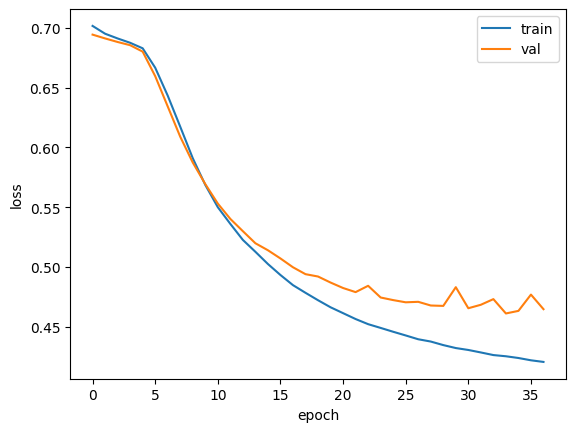

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
#plt.show()

In [ ]:
#입력 데이터가 엄청 커짐
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


#단어 임베딩
* 입력을 정수로 받음
* 자연어 처리에서 더 좋은 성능을 냄
* 고정된 크기의 실수 벡터로 바꾸어 줌

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


* 500*16 = 8000
* 임베딩 벡터의 크기 16*8 = 128
* 은닉상태 8*8 = 64
* 8개 절편
* = 200
* Dense층의 가중치 개수는 9개

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6955 - accuracy: 0.5081 - val_loss: 0.6944 - val_accuracy: 0.5084
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6914 - accuracy: 0.5257 - val_loss: 0.6927 - val_accuracy: 0.5116
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6882 - accuracy: 0.5426 - val_loss: 0.6912 - val_accuracy: 0.5190
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6850 - accuracy: 0.5616 - val_loss: 0.6899 - val_accuracy: 0.5284
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6814 - accuracy: 0.5733 - val_loss: 0.6883 - val_accuracy: 0.5352
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6772 - accuracy: 0.5870 - val_loss: 0.6869 - val_accuracy: 0.5418
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6727 - accuracy: 0.5987 - val_loss: 0.6852 - val_accuracy:

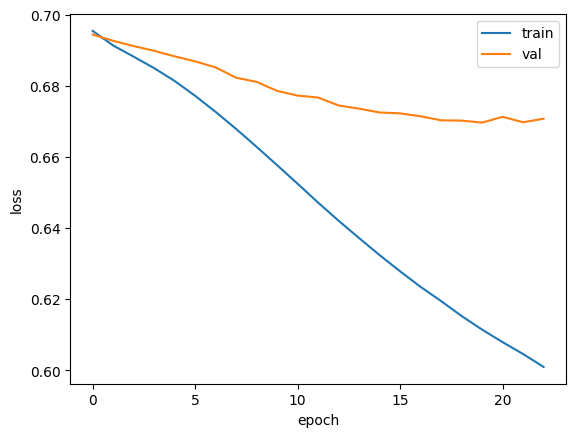

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()